In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


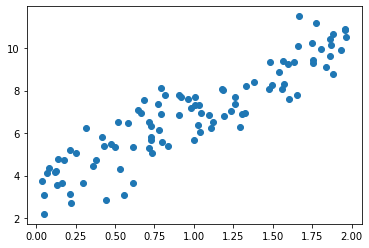

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = 2 * np.random.rand(100,1) # 0~1 사이의 균일분포 => shape : 100 x 1 
y = 4 + 3 * x + np.random.randn(100,1) # normal 분포 mu=0, var = 1 shape : 100 x 1
plt.scatter(x,y)
plt.show()

In [24]:
x_bias = np.c_[np.ones((100,1)),x]

theta_best = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y) # 정규방정식
theta_best

array([[3.47825997],
       [3.4580435 ]])

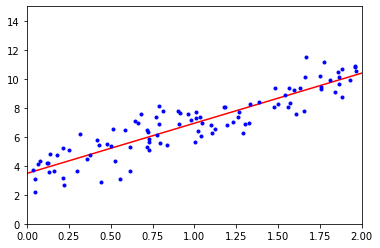

In [25]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

prediction = x_new_b.dot(theta_best)
prediction

plt.plot(x_new,prediction,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression #Sklearn을 활용해 더 쉽게 표현 가능 # 목적함수가 연속 형이다 이러면 bass모델 처럼 사용해보기
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)

[3.47825997] [[3.4580435]]


In [27]:
# 경사 하강법 (implementation)
1. 무작위 벡터 세타를 초기화한다
2. 파라미터 벡터 세타에 대해 비용 함수의 현재 그래디언트(기울기)를 계산한다.
3. 그래디언트(기울기)가 감소하는 방향으로 진행하면서, 최종적으로 계산된 그래디언트가 0이 되면 최솟값에 도달하도록 해야 한다.\

MSE 비용 함수는 볼록함수라 global minimum만 존재해서 학습률이 작아도 결국 global minimum에 도달할 수 있음
선형회귀 문제를 풀때는 특정 스케일을 해줘야 한다
StandardScaler 사용

SyntaxError: ignored

In [28]:
x = 2 * np.random.rand(100,1)
x_b = np.c_[np.ones((100,1)),x]
y = 4 + 3 * np.random.randn(100,1)

learning_rate = 0.001
iterations = 1000
m = x_b.shape[0] # x의 데이터 수

theta = np.random.randn(2,1)

for iteration in range(iterations):
  gradients = 2 /m*x_b.T.dot(x_b.dot(theta)-y) 
  theta = theta - (learning_rate * gradients)

theta

array([[2.32491101],
       [1.12984863]])

In [29]:
# 배치 경사 하강법 (Batch Gradient Descent) 
# 전체 데이터를 다 사용하기 때문에 큰 훈련 세트에서는 아주 느리다.

In [30]:
# 확률적 경사 하강법 (SGD)
# 매 스탭마다 한 개의 샘플을 무작위로 선택 및 그 샘플에 대한 그래디언트를 계산한다.
# 매 반복에서 적은 양의 데이터로 계산하고 업데이트 함
# 매우 큰 데이터도 처리가능 단, 무작위 추출이라 전체데이터를 사용하는 것 보다 안정적이지는 않다.
# MSE처럼 볼록 하지 않고 불균형하다면 배치 경사 하강법보다 global minimum에 도달할 가능성이 높다
# 무작위성으로 global minimum에 도달하지 않을 수 있따는 단점을 극복하기 위해 학습률을 점진적으로 감소시키는 해결책이 있다. 즉, 처음에 학습률을 높게 하기

In [31]:
epochs = 1000
t0, t1 = 5, 50 # 학습 스케쥴
x_b = np.c_[np.ones((100,1)),x]
m = x_b.shape[0] # 100개 x 데이터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0 , 분산 1 정규 분포 추출

for epoch in range(epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0 ~ m-1 까지 랜덤 숫자 1
    xi = x_b[random_index:random_index+1] # 1 x 2 크기
    yi = y[random_index:random_index+1] # 1 x 1 크기
    gredients = 2 * xi.T.dot(xi.dot(theta)-yi)
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gredients

theta

array([[3.40071071],
       [0.22616371]])

In [32]:
# 미니 배치

In [33]:
import numpy as np
data_num = 1000
x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * (x**2) + np.random.randn(1000,1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
print(lin_reg.intercept_, lin_reg.coef_)

[-0.99680736]
[-0.99680736  0.99362492]
[0.09791582] [[0.05100002 0.10293317]]


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model,x,y):
  x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2) # 80퍼 데이터는 실험용, 20퍼 데이터는 검증용
  train_errors,val_errors = [],[]
  for num in range(1,len(x_train)):
    model.fit(x_train[:num],y_train[:num])
    y_train_predict = model.predict(x_train[:num])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:num],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train_set')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val_set')   
  plt.legend()
  plt.show()

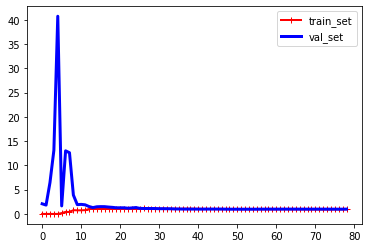

In [40]:
# basis function(4차 다항식)과 모델을 파이프라인을 거쳐서 바로 모델링 및 평가하는 법

from sklearn.pipeline import Pipeline
data_num = 100
x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * x**2 + np.random.randn(100,1)
polynomial_regression = Pipeline([
  ("poly_features",PolynomialFeatures(degree=4,include_bias=False)),
  ("lin_reg",LinearRegression())
  ])
plot_learning_curves(polynomial_regression,x,y)

In [ ]:
#  규제가 있는 선형 모델
# 앞에서도 보았듯이 과대적합을 감소시키는 것이 아주 중요하고, 그 과대적합을 줄일 수 있는 방법을 강구해야 한다.
# 그 방법 중 loss에 새로운 term을 추가하여서 모델 weight에 대한 규제를 가하는 것이다.

In [46]:
# Lasso Regression (라쏘 회귀)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # alpha값을 제대로 조정하는게 매우 중요 성능차이 많이 남  
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([0.17570747])

In [47]:
# Ridge Regression (릿지 회귀)
# Ridge(릿지)회귀는 선형 회귀의 규제된 버전이다.
# 비용 함수에 L2 term(가중치에 제곱을 한 형태)을 사용하여 weight에 규제를 한다.

# 안드레 루이 숄레스키가 발견한 행렬 분해(matrix factorization) 사용
# 숄레스키 분해의 장점은 성능이다. 원래 ridge의 solver default값은 'auto'이며 희소 행렬이나 특이 행렬이 아니면 'cholesky'가 된다.
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1,solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[0.30544187]])

In [48]:
# Elastic Net Regression (엘라스틱넷 회귀)
# Elastic Net(엘라스틱넷)은 릿지 회귀와 라쏘 회귀를 합성한 모델이다.
# 규제 term은 릿지회귀의 규제term과 단순히 더해서 사용하고, 혼합 비율 r을 조절해서 사용한다.
# r=0이면, 엘라스틱 넷은 => 릿지 회귀
# r=1이면, 엘라스틱 넷은 => 라쏘 회귀

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([0.2339902])

In [57]:
# Early Stopping (조기 종료)
# 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 것은 실제 비용함수에 규제항을 
# 추가하는 것 뿐만 아니라, 검증 에러가 훈련 에러에 비해 치솟게 되면 바로 훈련을
# 중지시키는 방법도 있다. 이를 early stopping이라 한다.

from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * x**2 + np.random.randn(100,1)

poly_scaler = Pipeline([
                        ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
                        ('std_scaler',StandardScaler())
])

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_train_poly_scaled = poly_scaler.fit_transform(x_train) # poly 랑 scaler 둘다 fit_transform 해줬기 때문에 밑에코드 x_val 에서는 그냥 transform으로 함
x_val_poly_scaled = poly_scaler.transform(x_val)

# warm_start=True 이면 fit 메서드가 호출될 때 처음부터 다시 하지 않고 이전 모델 파라미터에서 훈련 이어짐
# penalty : {‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’
# n_iter_no_change : Number of iterations with no improvement to wait before stopping fitting
# 'constant' : eta = eta0
# 'optimal' : eta = 1.0 / (alpha * (t + t0))
# 'invscaling' : eta = eta0 / pow(t, power_t)
# 'adaptive' : eta = eta0, as long as the training keeps decreasing
sgd_reg = SGDRegressor(n_iter_no_change=1,warm_start=True,penalty=None, #n_iter_no_change default값 = 5, 한번이라도 안올라가면 정지(Early Stopper hyper parameter )
                       learning_rate='constant',eta0=0.0005)  
SGDRegressor()
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled,y_train.ravel())
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)
  val_error = mean_squared_error(y_val,y_val_predict)
  if val_error<minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
    
print('best_epoch : ',best_epoch)
print('best_model : ',best_model)

best_epoch :  0
best_model :  SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=1, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=True)
